In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("../data/processed/master_file.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               20379 non-null  object 
 1   EPU_CAN            5535 non-null   float64
 2   IP_CAN             5507 non-null   float64
 3   10YS_CAN           1950 non-null   float64
 4   INF_CAN            474 non-null    float64
 5   EX_CAN             1904 non-null   float64
 6   IM_CAN             1904 non-null   float64
 7   RECESS_CAN         5157 non-null   float64
 8   GDP_CAN            1926 non-null   float64
 9   GDPC_CAN           194 non-null    float64
 10  GBR_CAN            3895 non-null   float64
 11  EXR_CAN            17002 non-null  float64
 12  CCI_CAN            3707 non-null   float64
 13  Unemployment_Rate  443 non-null    float64
 14  EPU_GER            5439 non-null   float64
 15  IP_GER             454 non-null    float64
 16  INF_GER            474

In [64]:
df = df.drop(columns=["Unnamed: 0", "10YS_CHI", "10YS_JAP", '2YS_MEX', '1OYS_MEX'])

In [65]:
print(df.columns)

Index(['date', 'EPU_CAN', 'IP_CAN', '10YS_CAN', 'INF_CAN', 'EX_CAN', 'IM_CAN',
       'RECESS_CAN', 'GDP_CAN', 'GDPC_CAN', 'GBR_CAN', 'EXR_CAN', 'CCI_CAN',
       'Unemployment_Rate', 'EPU_GER', 'IP_GER', 'INF_GER', 'UNEMP_GER',
       'IM_GER', 'EX_GER', 'RECESS_GER', 'GDP_GER', 'GDPC_GER', '10YS_GER',
       'EXR_GER', 'EPU_JAP', 'IP_JAP', 'INF_JAP', 'UNEMP_JAP', 'EX_JAP',
       'RECESS_JAP', 'GDP_JAP', 'GDPC_JAP', 'IM_JAP', 'EXR_JAP', 'EPU_USA',
       'IP_USA', 'YS_USA', 'INF_USA', 'UNEMP_USA', 'EX_USA', 'IM_USA',
       'BOPGSTB', 'RECESS_USA', 'GDP_USA', 'GDPC_USA', 'CCI_USA_x', 'EPU_MEX',
       'IP_MEX', 'INF_MEX', 'GDP_MEX', 'EXR_MEX', 'UNEMP_MEX', 'GDPC_MEX',
       'EX_MEX', 'IM_MEX', 'EX_MEX.1', 'RECESS_MEX', 'UNEMP_MEX+', 'GDPC_MEX+',
       'EPU_CHI', 'IP_CHI', 'INF_CHI', 'IM_CHI', 'EX_CHI', 'TB_CHI',
       'RECESS_CHI', 'EXR_CHI', 'UNEMP_CHI', 'GDPC_CHI', 'GDP_CHI', 'CCI_CHI',
       'CCI_GER', 'CCI_JAP', 'CCI_MEX', 'CCI_USA_y', 'YS_CAN', 'YS_MEX',
       'YS_CHI', 'YS

In [66]:
# Step 1: Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Step 2: Align all dates to the first of the month
df["date"] = df["date"].dt.to_period("M").dt.to_timestamp()

# Step 3: Sort and set index
df = df.sort_values("date")
df.set_index("date", inplace=True)

# Step 4: Group by month
monthly_groups = df.groupby(pd.Grouper(freq="MS"))

In [68]:
print(monthly_groups)

In [69]:
df

,EPU_CAN,IP_CAN,10YS_CAN,INF_CAN,EX_CAN,IM_CAN,RECESS_CAN,GDP_CAN,GDPC_CAN,GBR_CAN,...,GDP_CHI,CCI_CHI,CCI_GER,CCI_JAP,CCI_MEX,CCI_USA_y,YS_CAN,YS_MEX,YS_CHI,YS_GER
date,,,,,,,,,,,,,,,,,,,,,
1919-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779750
2025-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768869
2025-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
duplicates = df.index[df.index.duplicated()]
print(duplicates.value_counts())

date
2024-07-01    44
2022-03-01    44
2022-08-01    44
2023-08-01    44
2023-03-01    44
              ..
1960-07-01     1
1960-05-01     1
1960-04-01     1
1960-03-01     1
1960-02-01     1
Name: count, Length: 785, dtype: int64


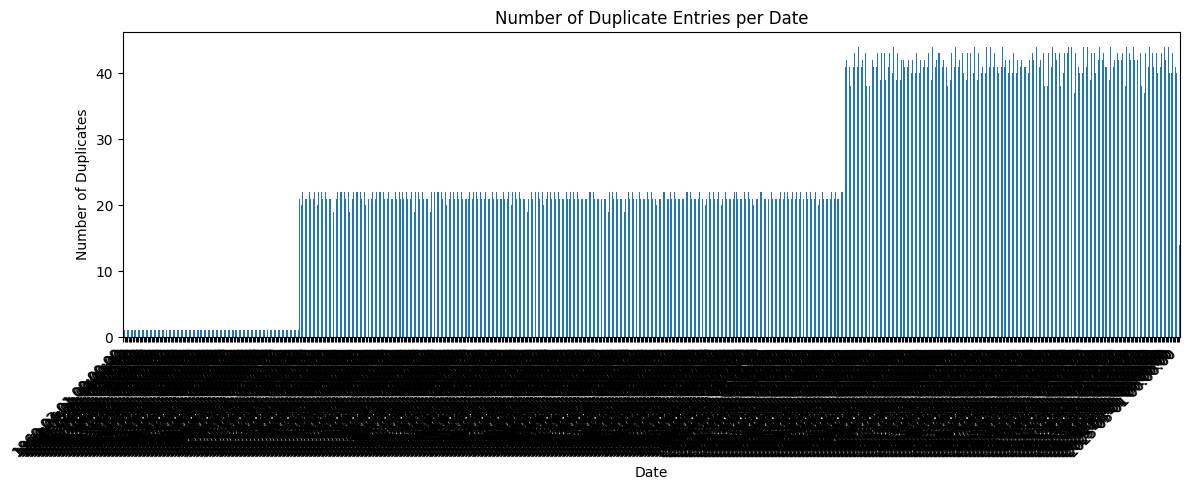

In [72]:
# Get the duplicated index and count how many times each date appears
duplicates = df.index[df.index.duplicated()]
dup_counts = duplicates.value_counts().sort_index()  # sort for proper x-axis order

# Plot
plt.figure(figsize=(12, 5))
dup_counts.plot(kind="bar")
plt.title("Number of Duplicate Entries per Date")
plt.xlabel("Date")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [73]:
df_with_index = df.reset_index()  # Brings index into the columns
full_duplicates = df_with_index[df_with_index.duplicated(keep=False)]
print(f"{len(full_duplicates)} fully duplicated rows (including index) found.")

255 fully duplicated rows (including index) found.


In [74]:
full_duplicates

,date,EPU_CAN,IP_CAN,10YS_CAN,INF_CAN,EX_CAN,IM_CAN,RECESS_CAN,GDP_CAN,GDPC_CAN,...,GDP_CHI,CCI_CHI,CCI_GER,CCI_JAP,CCI_MEX,CCI_USA_y,YS_CAN,YS_MEX,YS_CHI,YS_GER
778,1971-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,1971-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,1971-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1971-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1971-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20077,2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20088,2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20185,2025-01-01,883.28015,NaN,3.118476,NaN,NaN,NaN,NaN,613548.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.498636,NaN,NaN,0.417716


In [75]:
df = df.reset_index().drop_duplicates().set_index("date")

In [76]:
print(f"Remaining rows: {len(df)}")

Remaining rows: 20243
